In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
#from desi_retriever.denali import get_specs
import matplotlib.cm as cm
import scipy.ndimage as sn
import my_plot_style as mps
mps.my_plot_style()

### With the new everest dataset with the 0-500 fiber problem removed.

In [64]:
directory_everest = '/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/'
everest_all = Table.read(directory_everest+'ztile-sv1-dark-cumulative.fits')

directory_denali = '/global/cfs/cdirs/desi/spectro/redux/denali/'
denali_all = Table.read(directory_denali+'zcatalog-denali-cumulative.fits')


In [65]:
new_catalog_everest = everest_all['TARGETID','Z','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC','OBJTYPE'
                              ,'FIBERFLUX_R','FIBERFLUX_G','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER','FIBERTOTFLUX_G','PHOTSYS'].to_pandas()
new_catalog_denali = denali_all['TARGETID','Z','TILEID','DELTACHI2','TARGET_RA','TARGET_DEC'
                              ,'FIBERFLUX_R','FIBERFLUX_G','FLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_G','FLUX_Z','EBV','ZWARN','FIBER','FIBERTOTFLUX_G'].to_pandas()

In [66]:
everest_all

TARGETID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,EBV,FLUX_W1,FLUX_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,PRIORITY_INIT,NUMOBS_INIT,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET,HPXPIXEL,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,FLUX_IVAR_W1,FLUX_IVAR_W2,SV1_SCND_TARGET
int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,bytes4,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int32,int32,bytes8,int32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64
39627811400450722,15053.033520326018,120.59299796525191 .. 8.30069662294041,0.5568352985929291,5.8396824195505506e-05,0,7930,GALAXY,,10,4281.309276796877,0,311,311,0,0,149.77556258536936,1.0586056620173192,0.0,0.0,2020.9487,5400.0,1152921504724287601,1,TGT,86.004654,-285.3987,0,3200,0.7956702818144482,5,SER,1.6532638,8.12912,20.110859,547.1358,151.02396,26.285412,0,,0.0,0.0,0.0,0.0,0.024859264,50.279594,29.669958,0.56882113,2.796901,6.9193325,0.56883055,2.7969677,6.919425,0,1.5795285,0.9774124,0.015354433,0.15702374,S,1152921504724287601,262148,0,3200,1,0,0,,0,0.0,0.0,0.0,0.0,0,0,0,0,149.77556258536936,1.0586056620173192,80609,15,13500.0,4,1,-0.0021333334,0.009919678,-0.00033333333,0.010510312,149.77557114962852,0.13909909,1.0586042640805402,0.14537092,0.74234873,85.96993,-285.30527,1121.9512,0.70472807,215.5791,576.15375,3854.0645,1588.8105,18.672134,6.523178,79200.33,166.7239,14685.115,0.31913614,16754.275,98217.984,51.46509,243.25427,0.00011751697,550.5856,2.2792334e-05,0.0,24150.928,0.00017315628,111.38742,248.12695,80322.28,718.0142,14900.694,576.4729,44759.266,99806.8,181.52464,497.90442,0.0,0.0,0
616088563703874602,11799.816873192787,-49.57414757569759 .. 8.356731997914606,0.19988439936821337,5.0172618376695186e-05,5,7929,GALAXY,,10,6.570702858269215,0,272,272,1,0,149.88551829889585,1.0961757245368853,0.0,0.0,0.0,5400.0,4294967296,4,SKY,58.49101,-275.39816,0,-1,0.6015196580519788,63,,0.0,0.0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005585762,0.01694951,-0.112363815,0.0,0.0,0.0,0

In [67]:
catalog_match = new_catalog_everest.merge(new_catalog_denali,on='TARGETID',how='left',suffixes=("_everest","_denali"))
final_match_catalog = catalog_match[(catalog_match['TILEID_everest']==catalog_match['TILEID_denali']) & (catalog_match['OBJTYPE']==b'TGT')]
final_match_catalog['dz']=abs(final_match_catalog['Z_everest']-final_match_catalog['Z_denali'])/(1.+final_match_catalog['Z_everest'])

#final_match_catalog = final_match_catalog.merge(denali_data,on='TARGETID',how='left',suffixes=("","_denali"))

<ipython-input-67-6ed5fdd20fe6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match_catalog['dz']=abs(final_match_catalog['Z_everest']-final_match_catalog['Z_denali'])/(1.+final_match_catalog['Z_everest'])


Number (dz<0.0033):  205614
Number (dz>0.0033):  4404


Text(0, 0.5, 'Number')

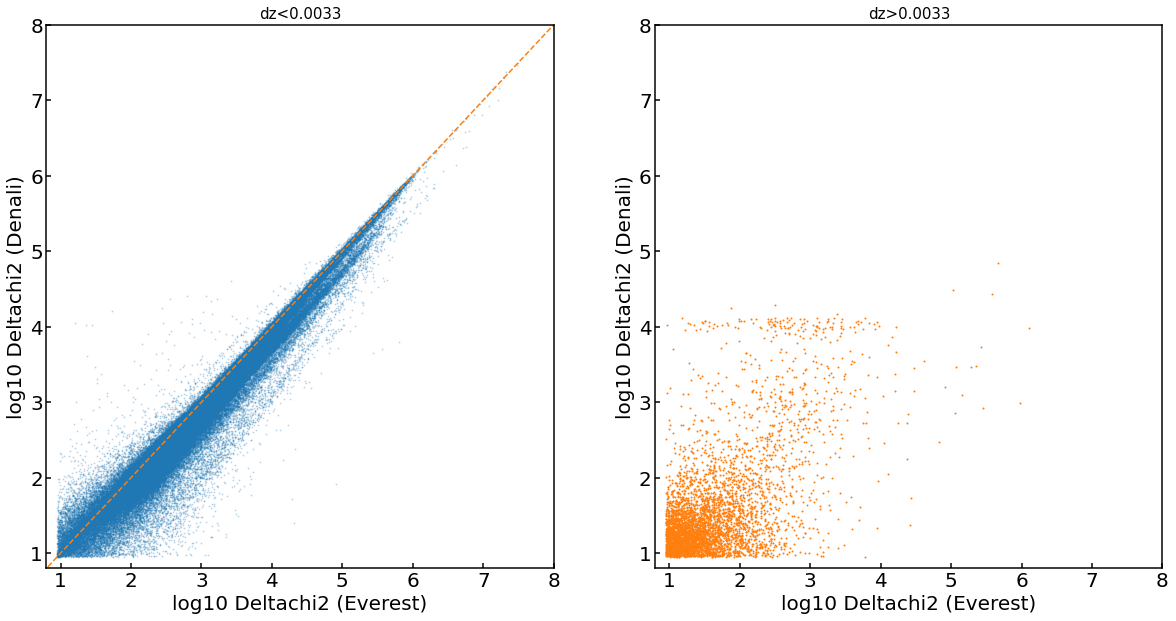

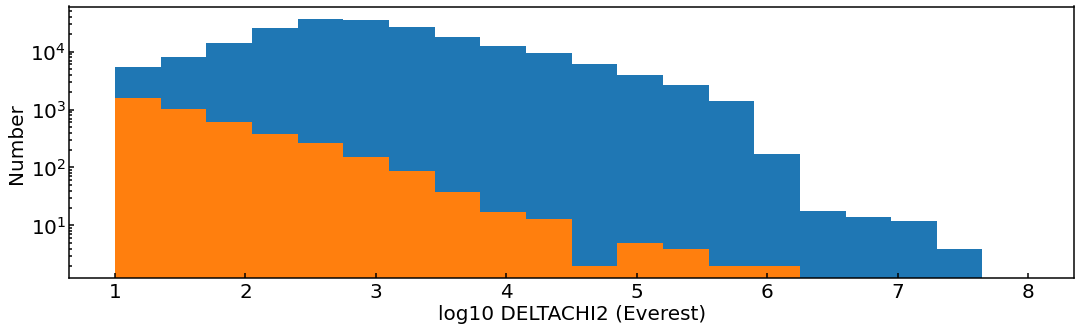

In [68]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['dz']<0.0033) & (final_match_catalog['OBJTYPE']==b'TGT')
plt.scatter(np.log10(final_match_catalog['DELTACHI2_everest'][search]),np.log10(final_match_catalog['DELTACHI2_denali'][search]),s=1,alpha=0.2)
plt.title('dz<0.0033',fontsize=15)
plt.xlabel('log10 Deltachi2 (Everest)',fontsize=20)
plt.ylabel('log10 Deltachi2 (Denali)',fontsize=20)
plt.plot(np.arange(0,10),np.arange(0,10),ls='--',color='C1')
print('Number (dz<0.0033): ', len(final_match_catalog['DELTACHI2_denali'][search]))
plt.xlim(0.8,8)
plt.ylim(0.8,8)
plt.subplot(1,2,2)
search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['dz']>0.0033)#& (final_match_catalog['DELTACHI2_denali']>100)
plt.scatter(np.log10(final_match_catalog['DELTACHI2_everest'][search]),np.log10(final_match_catalog['DELTACHI2_denali'][search]),s=1,alpha=1,c='C1')
plt.title('dz>0.0033',fontsize=15)
plt.xlabel('log10 Deltachi2 (Everest)',fontsize=20)
plt.ylabel('log10 Deltachi2 (Denali)',fontsize=20)
#plt.plot(np.arange(0,10),np.arange(0,10),ls='--',color='C1')
plt.xlim(0.8,8)
plt.ylim(0.8,8)
print('Number (dz>0.0033): ',len(final_match_catalog['DELTACHI2_denali'][search]))


plt.figure(figsize=(18,5))
search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['dz']<0.0033)#& (final_match_catalog['DELTACHI2_denali']>100)
plt.hist(np.log10(final_match_catalog['DELTACHI2_everest'][search]),bins=20,range=(1,8))
search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['dz']>0.0033)#& (final_match_catalog['DELTACHI2_denali']>100)
plt.hist(np.log10(final_match_catalog['DELTACHI2_everest'][search]),bins=20,range=(1,8))
plt.yscale('log')
plt.xlabel('log10 DELTACHI2 (Everest)',fontsize=20)
plt.ylabel('Number',fontsize=20)


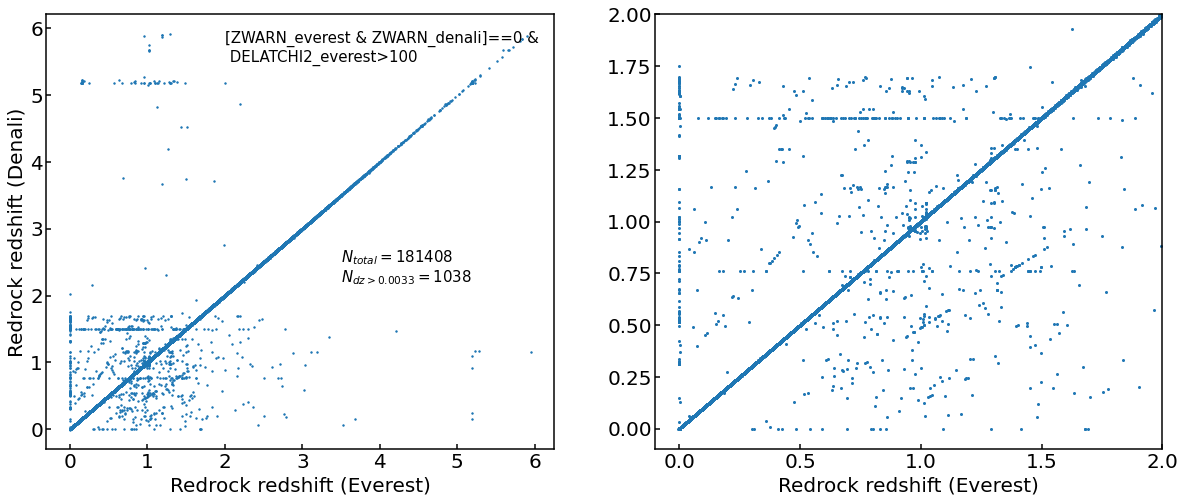

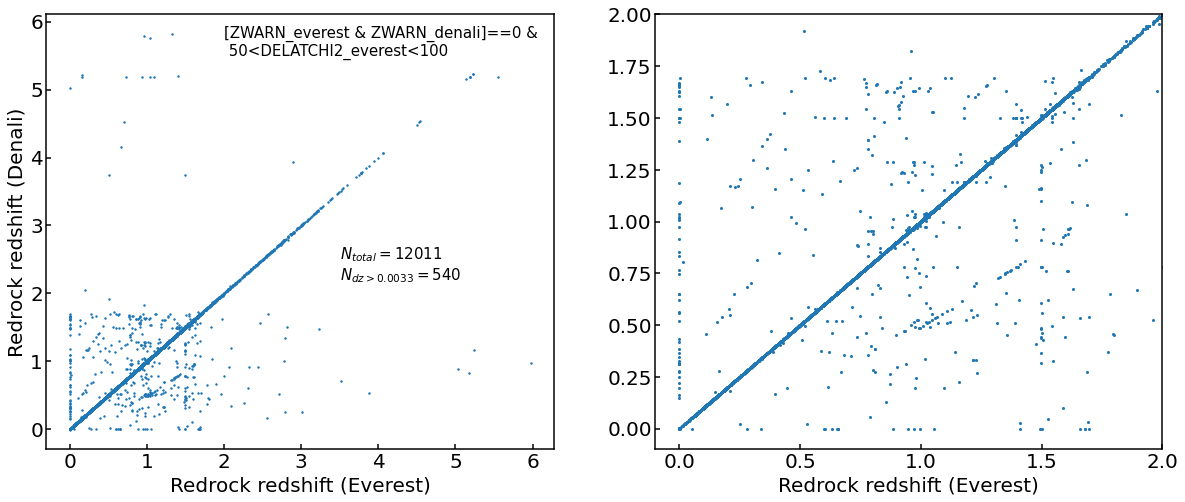

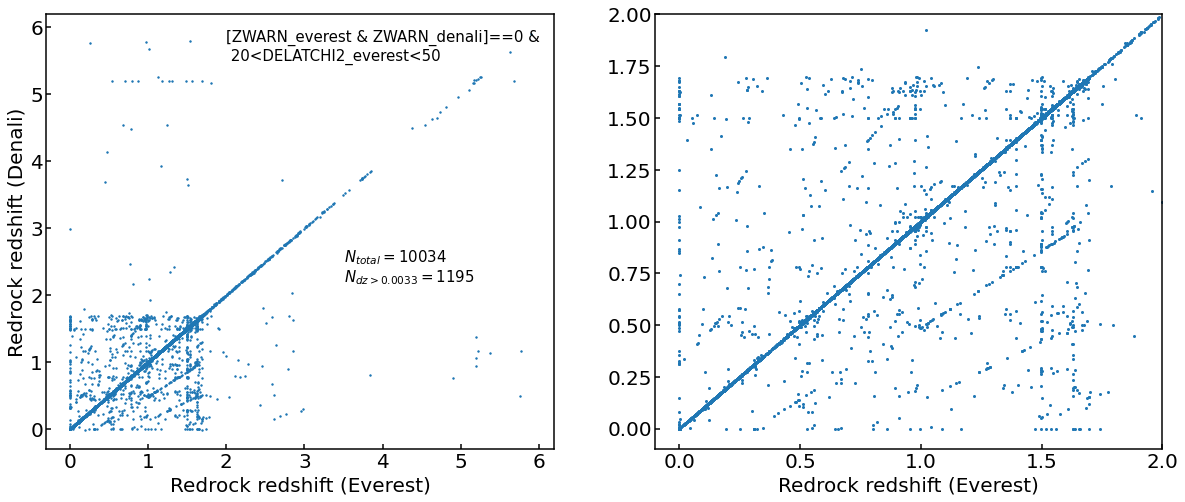

In [69]:
text_add = ['[ZWARN_everest & ZWARN_denali]==0 & \n DELATCHI2_everest>100','[ZWARN_everest & ZWARN_denali]==0 & \n 50<DELATCHI2_everest<100','[ZWARN_everest & ZWARN_denali]==0 & \n 20<DELATCHI2_everest<50']
total_n_list = []
n_dz_list = []
for i in range(0,3):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    search2 = (final_match_catalog['FIBER_everest']>=0) & (final_match_catalog['FIBER_everest']<500) & (final_match_catalog['dz']>0.0033)
    if i ==0:
        search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']>100) #& (final_match_catalog['DELTACHI2_everest']>50)
    
    elif i == 1:
        search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']<100) & (final_match_catalog['DELTACHI2_everest']>50)
    elif i == 2:
        search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']<50) & (final_match_catalog['DELTACHI2_everest']>20)
    #search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']<50) & (final_match_catalog['DELTACHI2_everest']>20)

    total_n = len(final_match_catalog[search])
    n_dz = len(np.where(final_match_catalog['dz'][search]>0.0033)[0])
    total_n_list.append(total_n)
    n_dz_list.append(n_dz)
    plt.scatter(final_match_catalog['Z_everest'][search],final_match_catalog['Z_denali'][search],s=2,alpha=1)
    combine_mask = search & search2
    #plt.scatter(final_match_catalog['Z_everest'][combine_mask],final_match_catalog['Z_denali'][combine_mask],s=2,alpha=1)

    plt.xlabel('Redrock redshift (Everest)',fontsize=20)
    plt.ylabel('Redrock redshift (Denali)',fontsize=20)
    plt.text(2,5.5,text_add[i],fontsize=15)
    plt.text(3.5,2.5,'$N_{total}=%0.0f$' % total_n,fontsize=15)
    plt.text(3.5,2.2,'$N_{dz>0.0033}=%0.0f$' % n_dz,fontsize=15)
    plt.subplot(1,2,2)
    plt.scatter(final_match_catalog['Z_everest'][search],final_match_catalog['Z_denali'][search],s=4,alpha=1)
    #plt.scatter(final_match_catalog['Z_everest'][combine_mask],final_match_catalog['Z_denali'][combine_mask],s=5,alpha=1,color='C1')
    #print(len(final_match_catalog['Z_everest'][combine_mask]))
    #plt.scatter(final_match_catalog['Z_everest'][combine_mask],final_match_catalog['Z_denali'][combine_mask],s=5,alpha=1)

    plt.xlim(-0.1,2)
    plt.ylim(-0.1,2)
    plt.xlabel('Redrock redshift (Everest)',fontsize=20)
    

In [70]:
print('Total objects: %0.0f' % np.sum(total_n_list))
print('Total inconsistent redshfits:%0.0f (%0.2f%%)' % (np.sum(n_dz_list),100.*np.sum(n_dz_list)*1.0/np.sum(total_n_list)))

Total objects: 203453
Total inconsistent redshfits:2773 (1.36%)


### Looking for FIBERs that produce the inconsistent redshifts

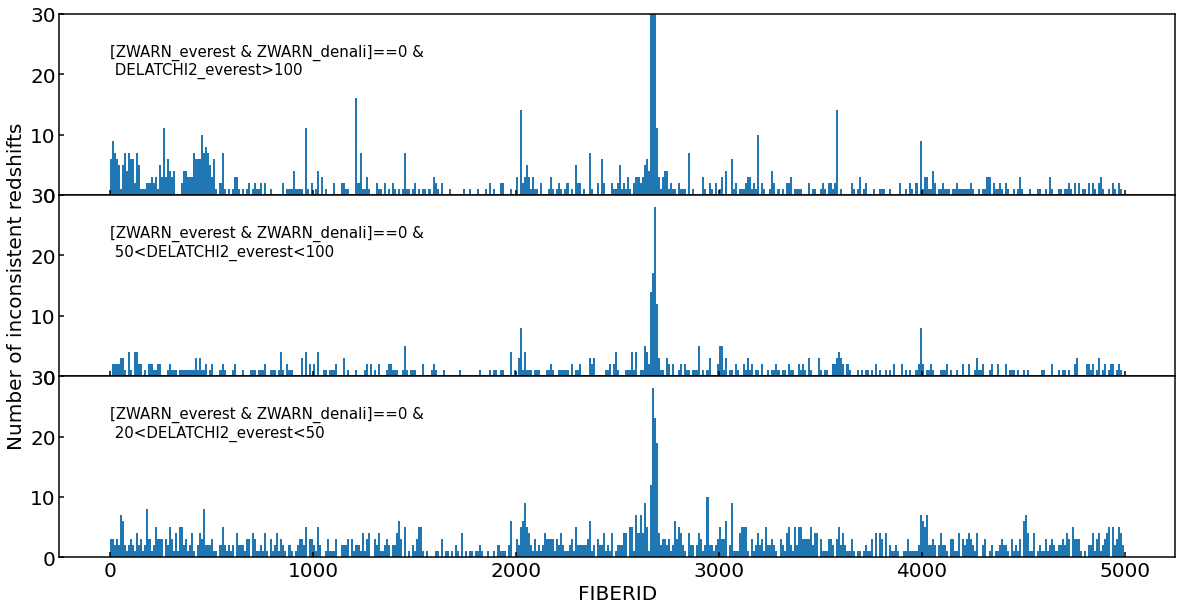

In [71]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.0)
for i in range(0,3):
    plt.subplot(3,1,i+1)
    if i ==0:
        search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']>100) & (final_match_catalog['dz']>0.0033)#& (final_match_catalog['DELTACHI2_everest']>50)
    elif i == 1:
        search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']<100) & (final_match_catalog['DELTACHI2_everest']>50) & (final_match_catalog['dz']>0.0033)
        plt.ylabel('Number of inconsistent redshifts',fontsize=20)
    
    elif i == 2:
        search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']<50) & (final_match_catalog['DELTACHI2_everest']>20) & (final_match_catalog['dz']>0.0033)
    plt.hist(final_match_catalog['FIBER_everest'][search],bins=500,range=(-0.5,4999.5))
    #plt.axvline(2026,ls='--',lw=0.5,color='grey')

    #plt.axvline(989,ls='--',lw=0.5,color='grey')
    #print(np.sum(y))
    #plt.figure(figsize=(20,10))
    #plt.plot(x,y)
    plt.xlabel('FIBERID',fontsize=20)
    plt.ylim(0,30)
    plt.text(0,20,text_add[i],fontsize=15)

(-0.1, 2.0)

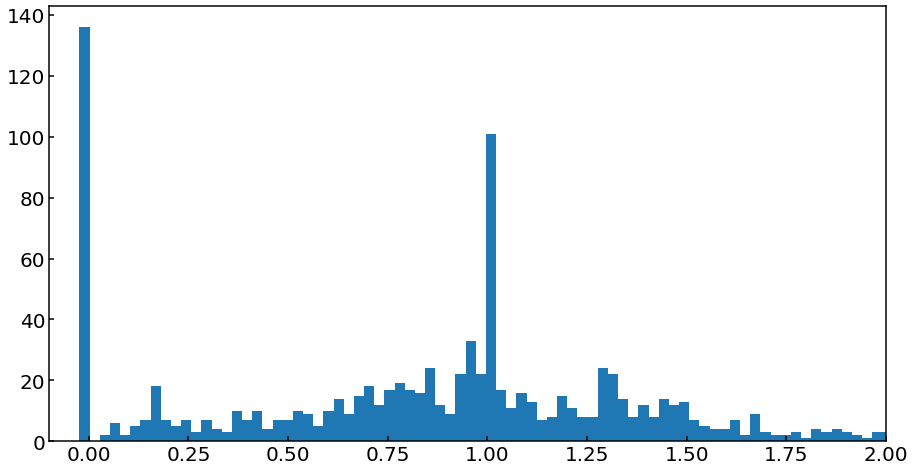

In [72]:
search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']>100) & (final_match_catalog['dz']>0.0033)#& (final_match_catalog['DELTACHI2_everest']>50)
plt.figure(figsize=(15,8))
redshift = plt.hist(final_match_catalog['Z_everest'][search],bins=200,range=(-0.1,5))
plt.xlim(-0.1,2)

In [73]:


out = np.histogram(final_match_catalog['FIBER_everest'][search],bins=5000,range=(-0.5,4999.5))
x = np.arange(0,5000)
y = out[0]

#search = np.where((x<2660) | (x>2690))[0]

#x = x[search]
#y = y[search]
new_x = x[np.argsort(y)][::-1]
new_y = y[np.argsort(y)][::-1]
#x = x[search[0]]

Text(0, 0.5, 'Number of inconsistent redshifts ')

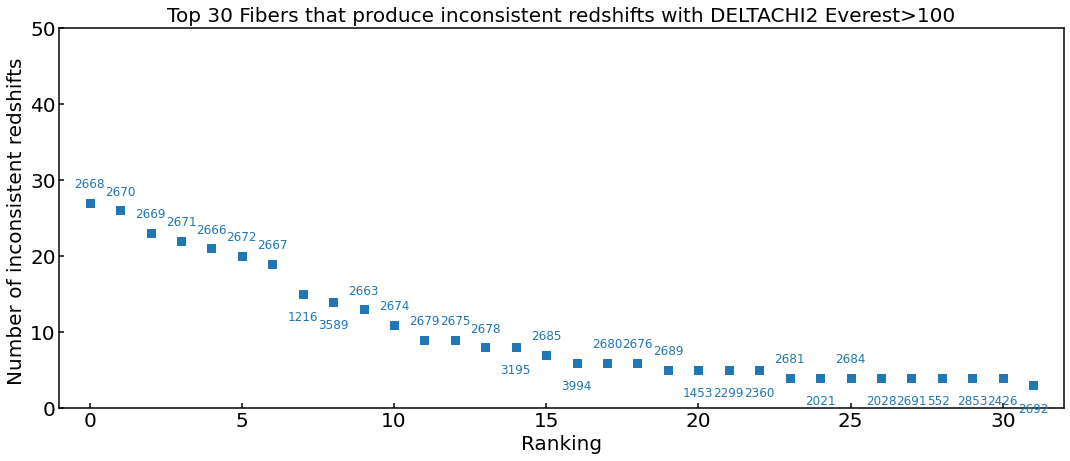

In [74]:
plt.figure(figsize=(18,7))
plt.scatter(x[0:32],new_y[0:32],marker='s',s=50)
for i in range(0,32):
    if (new_x[i]>2660) & (new_x[i]<2690):
        add = 2
    else:
        add = -3.5
    plt.text(x[i]-0.5,new_y[i]+add,new_x[i],fontsize=12,c='C0')
plt.xlim(-1,32)
plt.ylim(0,50)
plt.title('Top 30 Fibers that produce inconsistent redshifts with DELTACHI2 Everest>100')
plt.xlabel('Ranking',fontsize=20)
plt.ylabel('Number of inconsistent redshifts ',fontsize=20)

In [75]:
for i in range(0,50):
    if (new_x[i]<2660) | (new_x[i]>2695):
        print('      %0.0f' % new_x[i])
    else:
        print('%0.0f' % new_x[i])        

2668
2670
2669
2671
2666
2672
2667
      1216
      3589
2663
2674
2679
2675
2678
      3195
2685
      3994
2680
2676
2689
      1453
      2299
      2360
2681
      2021
2684
      2028
2691
      552
      2853
      2426
2692
      967
      513
2687
2688
      2519
      2026
      1
      1026
      1239
      2636
      456
      4484
      2171
      2259
      2020
      551
      1592
      1452


Text(0, 20, 'Somehow there is a systematic excess \n for fiber ~0-500')

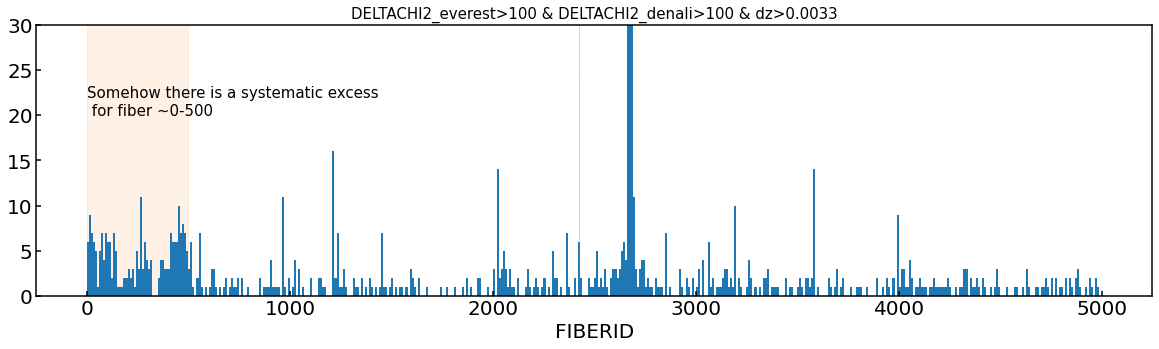

In [76]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=0.0)
search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']>100) & (final_match_catalog['dz']>0.0033)#& (final_match_catalog['DELTACHI2_everest']>50)
plt.hist(final_match_catalog['FIBER_everest'][search],bins=500,range=(-0.5,4999.5))
#plt.axvline(2026,ls='--',lw=0.5,color='grey')

plt.axvline(2426,ls='--',lw=0.5,color='grey')
#print(np.sum(y))
#plt.figure(figsize=(20,10))
#plt.plot(x,y)
plt.xlabel('FIBERID',fontsize=20)
plt.ylim(0,30)
plt.title('DELTACHI2_everest>100 & DELTACHI2_denali>100 & dz>0.0033',fontsize=15)
plt.fill_between((0,500),0,30,color='C1',alpha=0.1)
plt.text(0,20,'Somehow there is a systematic excess \n for fiber ~0-500',fontsize=15)

#### The systematics for 0=<fiber<500 could be due to spectra with bad sky residuals. The redshift distributions change bewteen Denali and Everest but could still have some systematics. 

In [77]:
search = (final_match_catalog['ZWARN_everest']==0) & (final_match_catalog['ZWARN_denali']==0) & (final_match_catalog['DELTACHI2_everest']>100) & (final_match_catalog['dz']>0.0033) & (final_match_catalog['FIBER_everest']<500)
'''
for i in range(0,100):
    print(np.array(final_match_catalog['TARGETID'][search])[i],np.array(final_match_catalog['Z_everest'][search])[i],np.array(final_match_catalog['Z_denali'][search])[i])
'''    

"\nfor i in range(0,100):\n    print(np.array(final_match_catalog['TARGETID'][search])[i],np.array(final_match_catalog['Z_everest'][search])[i],np.array(final_match_catalog['Z_denali'][search])[i])\n"

Text(0.5, 1.0, 'DELTACHI2_everest>100 & dz>0.0033 FIBER<=500')

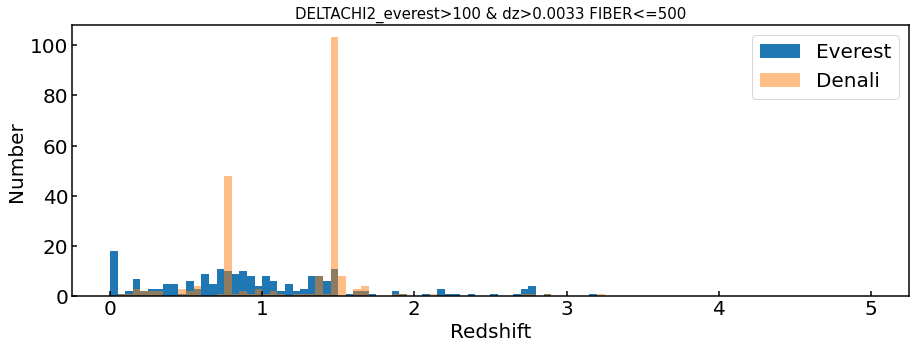

In [78]:
plt.figure(figsize=(15,5))
_ = plt.hist(np.array(final_match_catalog['Z_everest'][search]),bins=100,range=(0,5),label='Everest')
_ = plt.hist(np.array(final_match_catalog['Z_denali'][search]),bins=100,range=(0,5),label='Denali',alpha=0.5)
plt.legend()
plt.xlabel('Redshift',fontsize=20)
plt.ylabel('Number',fontsize=20)
plt.title('DELTACHI2_everest>100 & dz>0.0033 FIBER<=500',fontsize=15)

<img src="Example_bad_sky.png">

One example of bad sky substraction for those fibers <500